In [30]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [31]:
data = pd.read_csv("target.csv")

In [32]:
data=data.drop(['Unnamed: 7'], axis=1)
data=data.drop(['customer_id'], axis=1)

In [33]:
data = data.dropna(how='any')

In [34]:
data['res_type']= data['res_type'].map({'CN':0, 'CO': 1, 'RE': 2, 'TO': 3,'SI': 4}).astype(int)

In [35]:
data=pd.get_dummies(data=data,columns=['geo_group'])

In [36]:
X = data.drop(['res_type'], axis=1).values.astype('float64')

In [37]:
Y = data['res_type'].values.astype('int64')

In [38]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78804

In [39]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [40]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [41]:
from keras.utils import np_utils
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [42]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [43]:
model = Sequential()

In [44]:
model.add(Conv1D(filters=16*2,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(8,1), 
                 activation='relu'))

In [45]:
model.add(MaxPooling1D(pool_size=1))

In [46]:
model.add(Conv1D(filters=16,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [47]:
model.add(MaxPooling1D(pool_size=1))

In [48]:
model.add(Flatten())

In [49]:
model.add(Dense(8, activation='tanh'))

In [50]:
model.add(Dense(5,activation='softmax'))

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 8, 32)             64        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 8, 32)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 8, 16)             528       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 8, 16)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 1032      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 45        
Total para

In [52]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [53]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 63043 samples, validate on 15761 samples
Epoch 1/30
63043/63043 [==============================] - 4s 68us/step - loss: 1.4130 - acc: 0.3907 - val_loss: 1.2333 - val_acc: 0.5217
Epoch 2/30
63043/63043 [==============================] - 2s 36us/step - loss: 1.0833 - acc: 0.6174 - val_loss: 0.9175 - val_acc: 0.6607
Epoch 3/30
63043/63043 [==============================] - 3s 40us/step - loss: 0.7937 - acc: 0.7192 - val_loss: 0.6827 - val_acc: 0.7692
Epoch 4/30
63043/63043 [==============================] - 4s 57us/step - loss: 0.6016 - acc: 0.8154 - val_loss: 0.5248 - val_acc: 0.8619
Epoch 5/30
63043/63043 [==============================] - 2s 37us/step - loss: 0.4618 - acc: 0.8843 - val_loss: 0.4020 - val_acc: 0.8964
Epoch 6/30
63043/63043 [==============================] - 1s 18us/step - loss: 0.3564 - acc: 0.9078 - val_loss: 0.3155 - val_acc: 0.9158
Epoch 7/30
63043/63043 [==============================] - 1s 23us/step - loss: 0.2859 - acc: 0.9273 - val_loss: 0.2594 - val_acc

In [54]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

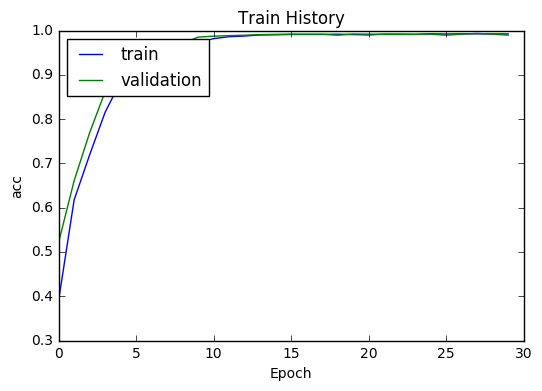

In [55]:
show_train_history(train_history,'acc','val_acc')

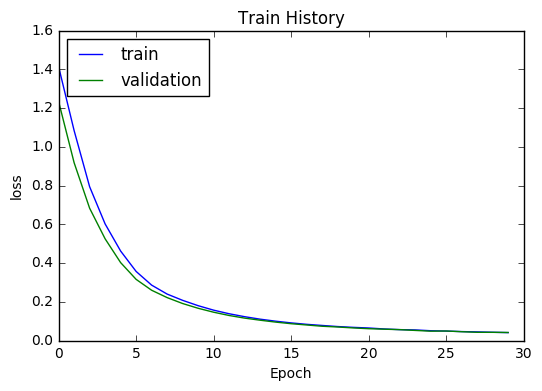

In [56]:
show_train_history(train_history,'loss','val_loss')

In [57]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19702/19702 [==============================] - 0s 23us/step


In [58]:
scores[1]

0.9903055527357628